# Imports

In [1]:
%load_ext autoreload
%autoreload 2
import mc.pocket as pocket
%aimport mc.pocket
from util import *
%aimport mc.util 
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import scipy

# T=0

## Monomers

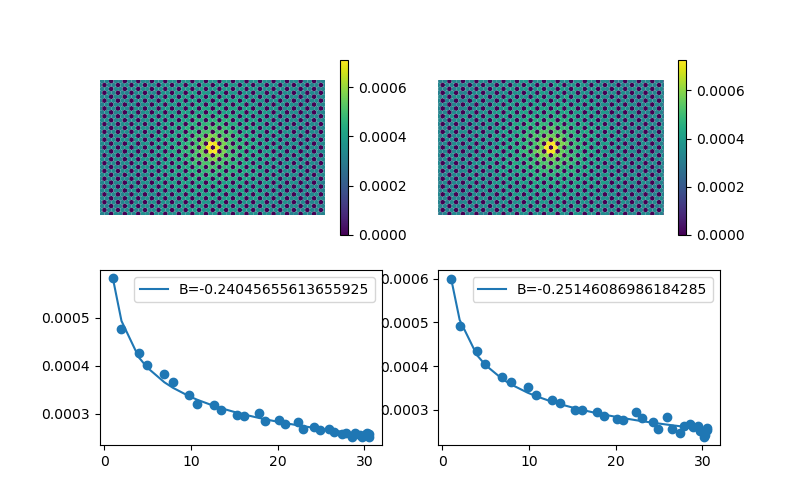

In [6]:
# data1 = read_accumulator("data/t0j0/doped/-1/96x96_r-3_t0.000000_j0.000_50000000.20_0/mono-mono.dat", skip=10)[0].reshape((96, 96))
# data2 = read_accumulator("data/t0j0/doped/-1/120x120_r-3_t0.000000_j0.000_50000000.20_0/mono-mono.dat", skip=10)[0].reshape((120, 120))

# data1 = read_accumulator("data/t0j0/doped2/-1/96x96_r-3_t0.000000_j0.000_50000000.20_0/mono-mono.dat", skip=0)[0].reshape((96, 96))
# data2 = read_accumulator("data/t0j0/doped2/-1/120x120_r-3_t0.000000_j0.000_50000000.20_0/mono-mono.dat", skip=0)[0].reshape((120, 120))

data1 = read_accumulator("data/t0j0/doped/-1/96x96_r-3_t0.000000_j0.000_50000000.20_0/mono-mono.dat", skip=10)[0].reshape((96, 96))
data2 = read_accumulator("data/t0j0/doped/-1/96x96_r-3_t0.000000_j0.000_200000000.50_0/mono-mono.dat", skip=10)[0].reshape((96, 96))
# data1 = read_accumulator("data/t0j0/doped2/-1/96x96_r-3_t0.000000_j0.000_50000000.20_0/mono-mono.dat", skip=10)[0].reshape((96, 96))

fig, ax = plt.subplots(2, 2, figsize=[8, 5])
plot2d(ax[0, 0], data1)
plot2d(ax[0, 1], data2)

def mod(data, x, y):
    return data.T[x%(data.shape[0]), y%(data.shape[1])]

def symmetrize(data):
    lin = [0]
    xs = np.arange(data.shape[0]//2)
    for i in range(1, data.shape[0]//2):
        total = 0
        total += mod(data, 0, i)
        total += mod(data, i, 0)
        total += mod(data, -i, i)
        total += mod(data, -i, 0)
        total += mod(data, -i, -i)
        total += mod(data, i, -i)
        lin.append(total / 6)
    lin = np.array(lin)

    L = data.shape[0]
    xs = np.sin(np.pi/L * xs) / (np.pi/L)

    indices = np.arange(len(xs))
    return xs[indices % 3 != 0], lin[indices % 3 != 0]

def fit(xs, ys):
    import scipy

    def fun(x, A, B):
        return B * np.power(np.abs(x), A)
    param, _ = scipy.optimize.curve_fit(fun, xs, ys, p0=[-0.25, 0.002])

    # def fun(x, A, B, C):
    #     return B * np.power(np.abs(x), A) + C
    # param, _ = scipy.optimize.curve_fit(fun, xs, ys, p0=[-0.25, 0.002, 0])

    # def fun(x, A, B, C):
    #     return B * np.exp(A * x) + C
    # param, _ = scipy.optimize.curve_fit(fun, xs, ys, p0=[-0.13, 0.002, 0])

    return fun, param

x1, y1 = symmetrize(data1)
fun, param = fit(x1[:], y1[:])
ax[1, 0].scatter(x1, y1)
ax[1, 0].plot(x1, fun(x1, *param), label=f"B={param[0]}")
# ax[1, 0].set_yscale("log")
# ax[1, 0].set_xscale("log")
ax[1, 0].legend()

x2, y2 = symmetrize(data2)
fun, param = fit(x2[:], y2[:])
ax[1, 1].scatter(x2, y2)
ax[1, 1].plot(x2, fun(x2, *param), label=f"B={param[0]}")
# ax[1, 1].set_yscale("log")
# ax[1, 1].set_xscale("log")
ax[1, 1].legend()

## Collapse

### Trimers

In [59]:
L, data = get_all_data("data/t0j0/-1/*_0/tri-tri.dat", lambda data, props: data[0].reshape((props["l"], props["l"], 2)), skip=10, by="l")

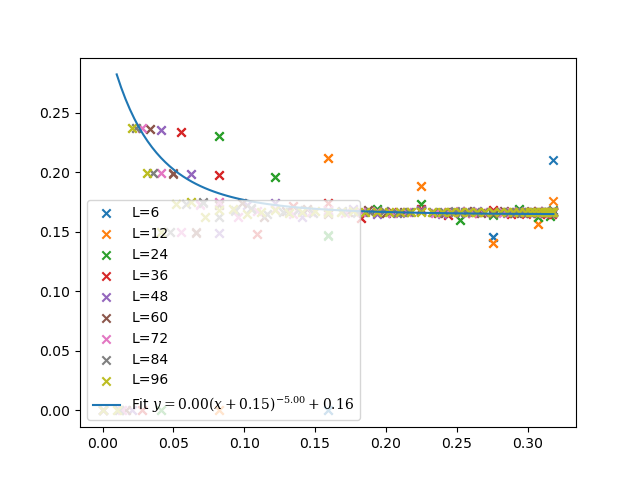

In [61]:
plt.close("all")
plt.figure()
xs = []
ys = []
for l, d in zip(L, data):
# for l, d in zip([96], [data[-1]]):
    x = np.arange(l)
    scaledx = np.sin(np.pi * x/l) / (np.pi/l)
    scaledx = scaledx/l

    d = d / l

    plt.scatter(scaledx, d[:, 0, 0], marker="x", label="L="+str(l))
    for i in range(d.shape[0]//2):
        if i % 3 != 2: continue
        xs.append(scaledx[i])
        ys.append(d[i, 0, 0])

x = np.linspace(0.01, 1/np.pi, 100)

def fun(x, A, B, C, D):
    return B * np.power(np.abs(x)+D, A) + C
param, _ = scipy.optimize.curve_fit(fun, xs[2:], ys[2:], p0=[-0.25, 1, 0.17, 0], bounds=([-5, 0, 0, -5], [-0.01, np.inf, 10, 5]))
plt.plot(x, fun(x, *param), label=f"Fit $y={param[1]:.2f}(x+{param[3]:.2f})^{{{param[0]:.2f}}}+{param[2]:.2f}$")

plt.legend()

### Monomers

In [589]:
L, data = get_all_data("data/t0j0/-1/*_0/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=1, by="l")

In [377]:
L, data = get_all_data("data/t0j0/1-48/*/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=1, by="l")

In [555]:
L, data = get_all_data("data/t0j0/doped/-1/*_0/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=1, by="l")

In [558]:
L, data = get_all_data("data/t0j0/doped/1.48/*/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=1, by="l")

In [550]:
L, data = get_all_data("data/t0j0/doped/1.196/*/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=4, by="l")

Text(0.5, 0, '$\\overline{x}/L$')

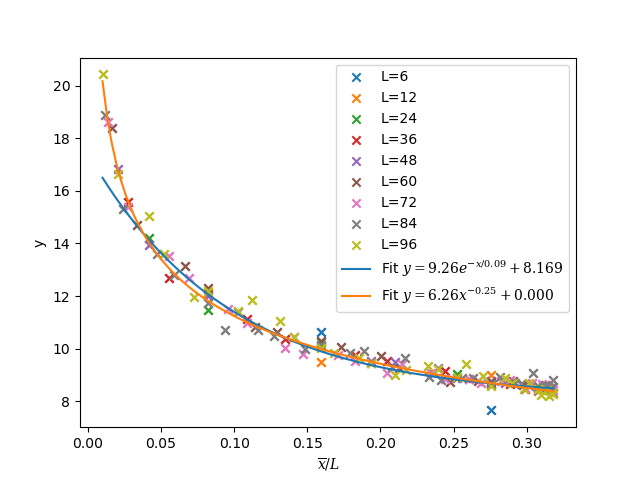

In [590]:
plt.close("all")
plt.figure()
xs = []
ys = []
for l, d in zip(L, data):
    x = np.arange(l)
    scaledx = np.sin(np.pi * x/l) / (np.pi/l)
    scaledx = scaledx/l

    d = d  * l**2

    plt.scatter(scaledx[x%3!=0], d[x%3!=0, 0], marker="x", label="L="+str(l))
    for i in range(d.shape[0]//2):
        if i % 3 == 0: continue
        xs.append(scaledx[i])
        ys.append(d[i, 0])

x = np.linspace(0.01, 1/np.pi, 100)

def fun(x, A, B, C):
    return B * np.exp(np.abs(x) / A) + C
param, _ = scipy.optimize.curve_fit(fun, xs[:20], ys[:20], p0=[-0.25, 1, 1/16], bounds=([-5, 0, 0], [-0.01, np.inf, 100]))
plt.plot(x, fun(x, *param), label=f"Fit $y={param[1]:.2f}e^{{-x/{-param[0]:.2f}}}+{param[2]:.3f}$")

def fun(x, A, B, C):
    return B * np.power(np.abs(x), A) + C
param, _ = scipy.optimize.curve_fit(fun, xs[:20], ys[:20], p0=[-0.25, 1, 0.0582], bounds=([-5, 0, 0], [-0.01, np.inf, 100]))
plt.plot(x, fun(x, *param), label=f"Fit $y={param[1]:.2f}x^{{{param[0]:.2f}}}+{param[2]:.3f}$")

plt.legend()
plt.ylabel("y")
plt.xlabel("$\\overline{x}/L$")

## Scaling

### Monomers

In [7]:
# L, data = get_all_data("data/t0j0/1-48/*/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=10, by="l")
L, data = get_all_data("data/t0j0/doped/1.48/*/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=10, by="l")
L, data = L[:-2], data[:-2]

[-1.96176044 -0.99985232]


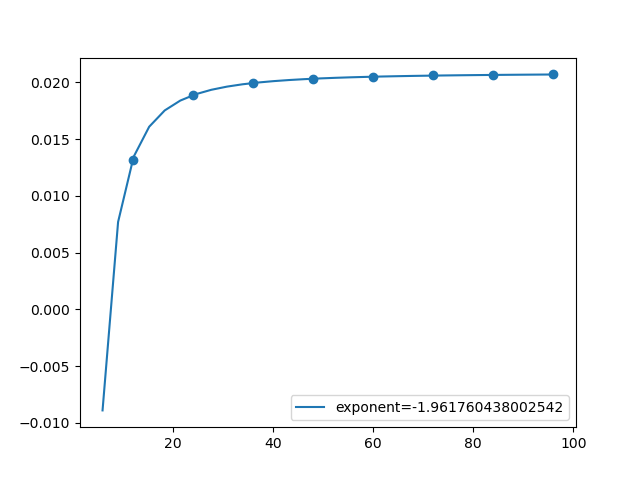

In [32]:
plt.figure()
xs = []
ys = []
for l, d in zip(L, data):
    xs.append(l)
    ys.append((d[l//3:2*l//3, 0].mean()))

# plt.xscale("log")
# plt.yscale("log")
plt.scatter(xs, ys)

def fit(xs, ys):
    def fun(x, A, B):
        return B * np.power(np.abs(x), A) + 1/48
    param, _ = scipy.optimize.curve_fit(fun, xs, ys, p0=[-0.25, -0.001], bounds=([-2, -1], [0, 1]))
    return fun, param

fun, param = fit(xs, ys)
xs = np.linspace(6, 96, 30)
plt.plot(xs, fun(xs, *param), label=f"exponent={param[0]}")
plt.legend()
print(param)

[-0.99999784 -0.24962146  0.        ]


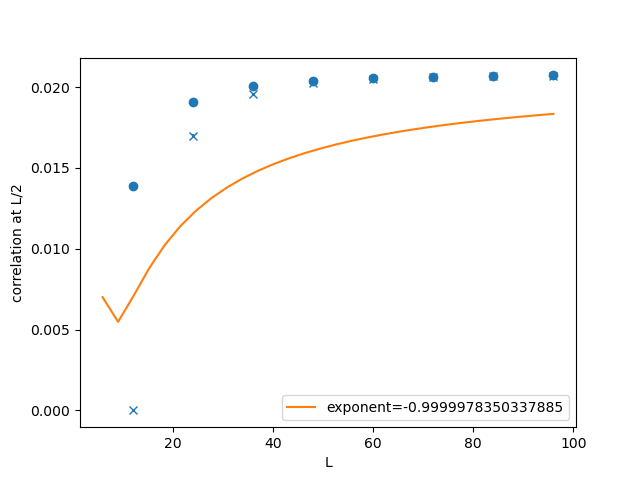

In [34]:
def fit(xs, ys):
    import scipy

    def fun(x, A, B, C):
        return B * np.power(np.abs(x), A) + np.power(np.abs(x), -2) + 1/48
    param, _ = scipy.optimize.curve_fit(fun, xs, ys, p0=[-0.25, 1, 0], bounds=([-1, -10, -1], [0, 10, 1]))
    # def fun(x, A, B):
    #     return B * np.power(np.abs(x), A)
    # param, _ = scipy.optimize.curve_fit(fun, xs, ys, p0=[-0.25, -0.001], bounds=([-2, -1], [0, 1]))

    return fun, param

values = []
for l, d in zip(L, data):
    x = l//2
    values.append((d[x, 0] + d[0, x] + d[-x, x])/3)

values = np.array(values)

plt.figure()
fun, param = fit(L[0:], values[0:])

# plt.xscale("log")
# plt.yscale("log")

# values = values - param[2]
# if param[1] < 0:
#     values = values * -1

# fun, param = fit(L[0:], values[0:])

plt.errorbar(L, values, yerr=np.sqrt(np.abs(values))/1581, marker="x", ls="")
xs = np.linspace(6, 96, 30)
plt.plot(xs, fun(xs, *param), label=f"exponent={param[0]}")
plt.scatter(L, -np.power(L, -2.)+1/48)
plt.legend()
plt.xlabel("L")
plt.ylabel("correlation at L/2")
print(param)

### Trimers

In [51]:
L, data, N = get_all_data("data/t0j0/doped/-1/*20_0/tri-tri.dat", lambda data, props: data[0].reshape((props["l"], props["l"], 2)), skip=3, by="l", with_counts=True)
# L, data = get_all_data("data/t0j0/doped/1.48/*_0/tri-tri.dat", lambda data, props: data[0].reshape((props["l"], props["l"], 2)), skip=30, by="l")
# L, data = get_all_data("data/t0j0/full/*_0/tri-tri.dat", lambda data, props: data[0].reshape((props["l"], props["l"], 2)), skip=50, by="l")
L, data, N = L, data, N

Text(0, 0.5, 'Trimer correlation at L/2')

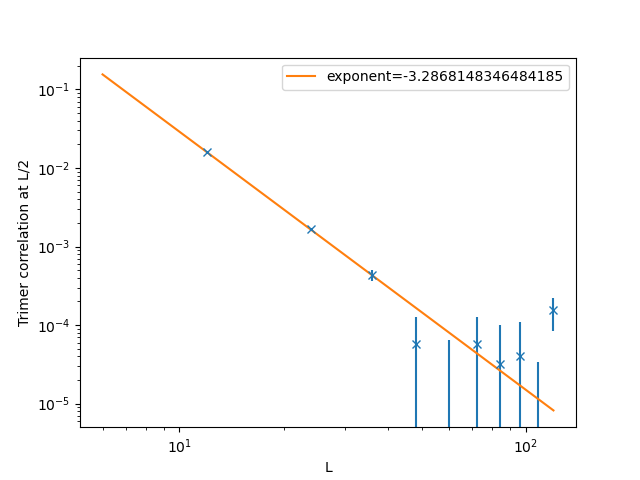

In [52]:
def fit(xs, ys):
    import scipy

    # def fun(x, A, B, C):
    #     return B * np.power(np.abs(x), A) + C
    # param, _ = scipy.optimize.curve_fit(fun, xs, ys, p0=[-2, 1, 0])
    def fun(x, A, B):
        return B * np.power(np.abs(x), A)
    param, _ = scipy.optimize.curve_fit(fun, xs, ys, p0=[-2, 1])

    return fun, param

values = []
for l, d in zip(L, data):
    values.append(d[l//2,0,0])

values = np.array(values)  - 1/6 *(47/48)
if values[0] < 0:
    values *= -1

plt.figure()
# plt.scatter(L, values)
plt.errorbar(L, values, yerr=np.sqrt((values + 1/6)*(1-values-1/6))/np.sqrt(N*12), ls="", marker="x")
fun, param = fit(L, values)
xs = np.linspace(6, 120, 30)
plt.plot(xs, fun(xs, *param), label=f"exponent={param[0]}")

if len(param) >= 3:
    plt.axhline(param[2], ls="--")

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel("L")
plt.ylabel("Trimer correlation at L/2")

# T>0

## Trimer-trimer correlations

Text(0.5, 1.0, 'J=-0.1 T=0.05 48x48')

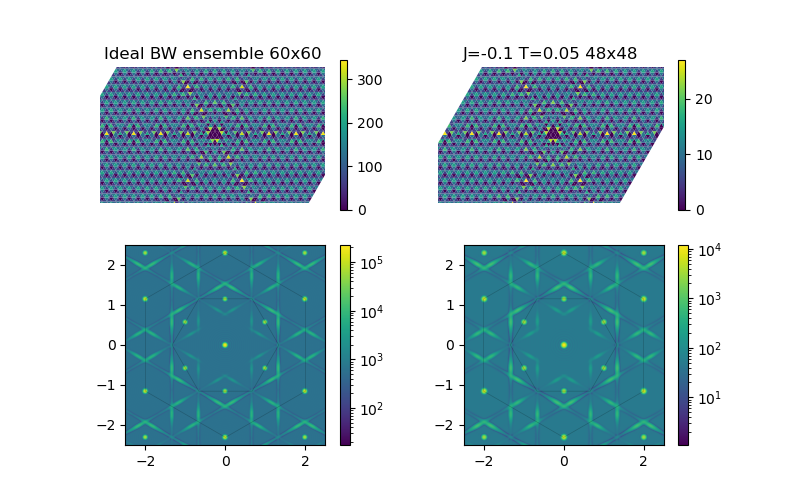

In [74]:
data1 = read_accumulator("data/idealbw/60x60_r-3_uinf_4j0.00_1000.1_0/tri-tri.dat")[0].reshape((60, 60, 2))
data2 = read_accumulator("data/vsweeps/-0.1/48x48_r-0_t0.0200_j-0.1000_40000000.5_0/tri-tri.dat")[0].reshape((48, 48, 2))
fig, ax = plt.subplots(2, 2, figsize=[8, 5], height_ratios=[6, 8])
plot2d_hex(ax[0,0], data1)
plot2d_hex(ax[0,1], data2)
plot_FT(ax[1,0], FT_hex(data1), proj="logabs")
plot_FT(ax[1,1], FT_hex(data2), proj="logabs")
ax[0,0].set_title("Ideal BW ensemble 60x60")
ax[0,1].set_title("J=-0.1 T=0.05 48x48")

Text(0.5, 1.0, 'J=0.1 T=0.09 48x48')

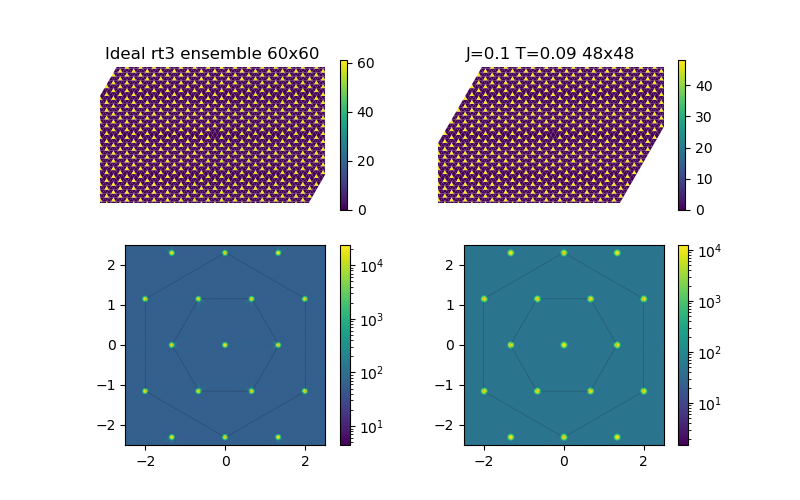

In [145]:
data1 = read_accumulator("data/idealrt3/60x60_r-0_t0.000000_j0.000_1000.1_0/tri-tri.dat")[0].reshape((60, 60, 2))
data2 = read_accumulator("data/vsweeps/0.1/48x48_r-0_t0.0900_j0.1000_40000000.5_0/tri-tri.dat")[0].reshape((48, 48, 2))
fig, ax = plt.subplots(2, 2, figsize=[8, 5], height_ratios=[6, 8])
plot2d_hex(ax[0,0], data1)
plot2d_hex(ax[0,1], data2)
plot_FT(ax[1,0], FT_hex(data1), proj="logabs")
plot_FT(ax[1,1], FT_hex(data2), proj="logabs")
ax[0,0].set_title("Ideal rt3 ensemble 60x60")
ax[0,1].set_title("J=0.1 T=0.09 48x48")

Text(0.5, 1.0, 'T=0.5 J=0 48x48')

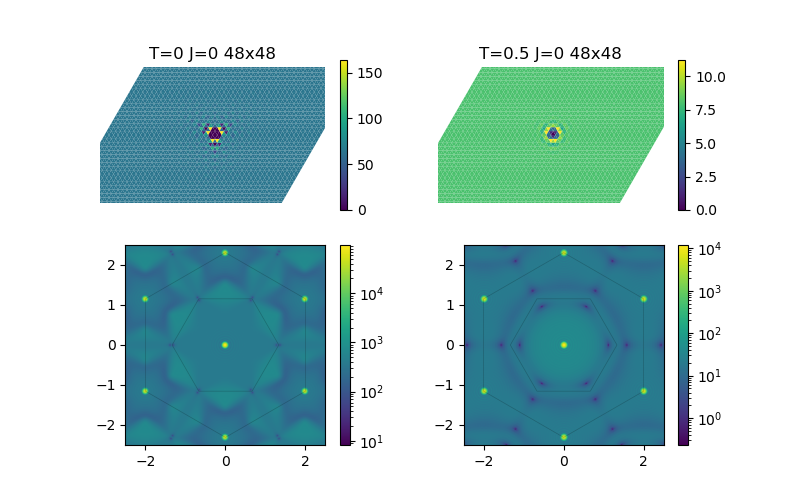

In [77]:
data1 = read_accumulator("data/rt3trans/48x48_r-3_uinf_4j0.00_20000000.5_0/tri-tri.dat")[0].reshape((48, 48, 2))
data2 = read_accumulator("data/vsweeps/0.01/48x48_r-0_t0.5000_j0.0100_40000000.5_0/tri-tri.dat")[0].reshape((48, 48, 2))
fig, ax = plt.subplots(2, 2, figsize=[8, 5], height_ratios=[6, 8])
plot2d_hex(ax[0,0], data1)
plot2d_hex(ax[0,1], data2)
plot_FT(ax[1,0], FT_hex(data1), proj="logabs")
plot_FT(ax[1,1], FT_hex(data2), proj="logabs")
ax[0,0].set_title("T=0 J=0 48x48")
ax[0,1].set_title("T=0.5 J=0 48x48")

## Monomer density J=0

Text(0.5, 1.0, 'Overlap density')

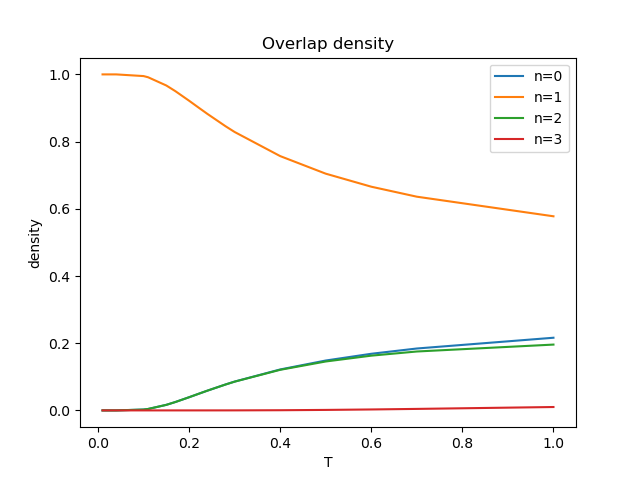

In [144]:
ts1, ds1 = get_all_data("data/vsweeps/0/*/cluster-count.dat", lambda data, props: data[0])
plt.figure()
plt.plot(ts1, ds1[:, 0]/48/48, label="n=0")
plt.plot(ts1, ds1[:, 1]/48/48, label="n=1")
plt.plot(ts1, ds1[:, 2]/48/48, label="n=2")
plt.plot(ts1, ds1[:, 3]/48/48, label="n=3")
plt.xlabel("T")
plt.ylabel("density")
plt.legend()
plt.title("Overlap density")

## Fit to decoupled

In [7]:
ts1, ds1 = get_all_cvs("data/vsweeps/0/*/energy.dat")

[3.0059377  0.17422446 1.74568071]
[[ 4.77760371e-02 -2.69353355e-03  1.23323826e-03]
 [-2.69353355e-03  1.52848769e-04 -5.97863061e-05]
 [ 1.23323826e-03 -5.97863061e-05  2.20646656e-04]]


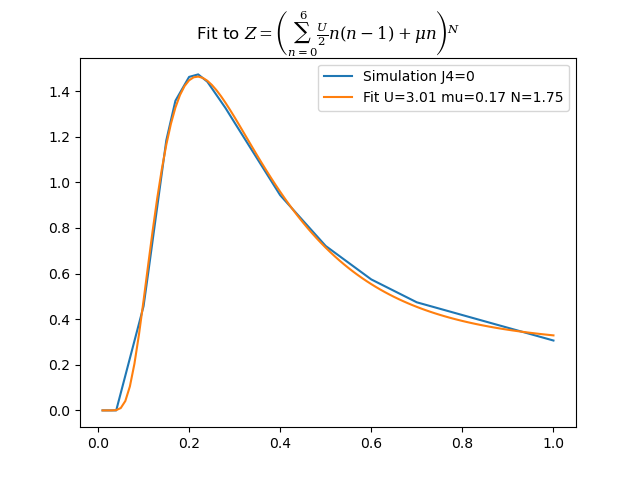

In [73]:
def cv(t, u, mu, c):
    mu = mu * u
    N = 6
    nZ = np.zeros_like(t)
    dnZ = np.zeros_like(t)

    Z = np.zeros_like(t)
    dZ = np.zeros_like(t)

    for n in range(N):
        nZ += n * np.exp(-1/t*(u*n*(n-1)/2 + mu*n))
        dnZ += n/t**2 * (n*mu + n*(n-1)*u/2) * np.exp(-1/t*(u*n*(n-1)/2 + mu*n))

        Z += np.exp(-1/t*(u*n*(n-1)/2 + mu*n))
        dZ += 1/t**2 * (n*mu + n*(n-1)*u/2) * np.exp(-1/t*(u*n*(n-1)/2 + mu*n))

    return c * (dnZ * Z - nZ * dZ) / Z**2

plt.figure()

import scipy
popt, pcov = scipy.optimize.curve_fit(cv, ts1, ds1/4, p0=[1, 0.3, 2])

plt.plot(ts1, ds1/4, label="Simulation J4=0")
xs = np.linspace(0.01, 1, 100)
plt.plot(xs, cv(xs, *popt), label="Fit U=3.01 mu=0.17 N=1.75")
plt.title(r"Fit to $Z=\left(\sum_{n=0}^6 \frac{U}{2}n(n-1) + \mu n \right)^N$")
plt.legend()
print(popt)
print(pcov)
# plt.plot(xs, cv(xs, 3, 0.15, ))

## Monomer and Trimer correlation at high T